In [42]:
import os
import pdb
import numpy as np
import matplotlib.pyplot as plt

from ica_attack import correlation
from scipy.stats import pearsonr

In [81]:
dataset = 'ml100k'
x = np.load(os.path.join("data", dataset + '.npy'))
px = np.load(os.path.join("data", dataset + '_px_0.npy'))
xq = np.load(os.path.join("data", dataset + '_xq_0.npy'))
pxq = np.load(os.path.join("data", dataset + '_pxq_0.npy'))
random = np.load(os.path.join("data", dataset + '_random_0.npy'))

In [82]:
def root_mse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

def np_pearson_cor(x, y):
    xv = x - x.mean(axis=0)
    yv = y - y.mean(axis=0)
    xvss = (xv * xv).sum(axis=0)
    yvss = (yv * yv).sum(axis=0)
    cor_matrix = np.matmul(xv.transpose(), yv) / np.sqrt(np.outer(xvss, yvss))
    # bound the values to -1 to 1 in the event of precision issues
    cor_matrix = np.maximum(np.minimum(cor_matrix, 1.0), -1.0)
    
    index_list = np.arange(len(cor_matrix[0]))
    pearson_result = []
    index_result = []
    for i in range(len(cor_matrix)):
        index = np.argmax(cor_matrix[i][index_list])
        pearson_result.append(cor_matrix[i][index])
        index_result.append(index_list[index])
        index_list = np.delete(index_list, index)
    
    rmse_result = []
    for i in range(len(index_result)):
        rmse_result.append(root_mse(x[:, i], y[:, index_result[i]]))
    
    return np.mean(pearson_result), np.mean(rmse_result)

In [83]:
print(np_pearson_cor(pxq, x))
print(np_pearson_cor(random, x))

print(np_pearson_cor(pxq.T, x.T))
print(np_pearson_cor(random.T, x.T))

(0.0079705677230172, 1.9940018228151986)
(0.0016268246420190723, 1.3807991808232238)
(-0.0001081677560047415, 1.7731852525994074)
(0.003468710909118465, 1.3398822251335476)


In [61]:
index_list = np.arange(len(a[0]))
result = []
index_result = []
for i in range(len(a)):
    index = np.argmax(a[i][index_list])
    result.append(a[i][index])
    index_result.append(index_list[index])
    index_list = np.delete(index_list, index)
print(np.mean(result), index_result)

0.005468252148591862 [6, 1, 2, 11, 0, 10, 5, 9, 4, 3, 8, 7]


In [48]:
print(np_pearson_cor(px, x).max(0).mean(), np_pearson_cor(px.T, x.T).max(0).mean())
print(np_pearson_cor(xq, x).max(0).mean(), np_pearson_cor(xq.T, x.T).max(0).mean())
print(np_pearson_cor(pxq, x).max(0).mean(), np_pearson_cor(pxq.T, x.T).max(0).mean())
print(np_pearson_cor(random, x).max(0).mean(), np_pearson_cor(random.T, x.T).max(0).mean())

0.12786248570887787 0.256785353819297
0.3040736532788729 0.10020921192518221
0.2787725346703635 0.12015516545711297
0.09974346085326821 0.07731516893874765


In [49]:
print(np_pearson_cor(px, x).max(0).mean(), np_pearson_cor(px.T, x.T).max(0).mean())
print(np_pearson_cor(xq, x).max(0).mean(), np_pearson_cor(xq.T, x.T).max(0).mean())
print(np_pearson_cor(pxq, x).max(0).mean(), np_pearson_cor(pxq.T, x.T).max(0).mean())
print(np_pearson_cor(random, x).max(0).mean(), np_pearson_cor(random.T, x.T).max(0).mean())

0.0024444997742609996 -5.1183690113794616e-05
1.6946233789593408e-05 -0.00595979952127916
0.00028962353138500813 6.358980808667646e-06
-1.769594820087135e-05 -7.535024492423405e-05


In [36]:


def correlation(real_x, rec_x, correlation_func=pearsonr, comp_func=np.max):
    m, n = real_x.shape
    used_index = []
    if m <= n:
        results = []
        for i in range(rec_x.shape[0]):
            tmp_result = []
            for j in range(real_x.shape[0]):
                tmp_result.append(correlation_func(rec_x[i], real_x[j])[0])
            selected_result = comp_func([tmp_result[e] for e in range(real_x.shape[0]) if e not in used_index])
            results.append(selected_result)
        print(
            f'{getattr(correlation_func, "__name__")} '
            f'Mean {np.mean(results)} {getattr(comp_func, "__name__")} {comp_func(results)}'
        )
    else:
        correlation(real_x.T, rec_x.T, correlation_func=correlation_func, comp_func=comp_func)

In [38]:
correlation(real_x=x, rec_x=px, correlation_func=pearsonr, comp_func=np.max)
correlation(real_x=x, rec_x=px, correlation_func=root_mse, comp_func=np.min)

pearsonr Mean 0.025187560949552615 amax 0.05526887344847148
root_mse Mean 1.0024829301831428 amin 1.0008082105856113


In [39]:
correlation(real_x=x, rec_x=xq, correlation_func=pearsonr, comp_func=np.max)
correlation(real_x=x, rec_x=xq, correlation_func=root_mse, comp_func=np.min)

pearsonr Mean 0.40836268346806404 amax 0.8652098645885484
root_mse Mean 0.904870699336637 amin 0.19129029493572283


In [40]:
correlation(real_x=x, rec_x=pxq, correlation_func=pearsonr, comp_func=np.max)
correlation(real_x=x, rec_x=pxq, correlation_func=root_mse, comp_func=np.min)

pearsonr Mean 0.021931921260476255 amax 0.03034403694677544
root_mse Mean 0.9183797693963061 amin 0.36897314177501855


In [41]:
correlation(real_x=x, rec_x=random, correlation_func=pearsonr, comp_func=np.max)
correlation(real_x=x, rec_x=random, correlation_func=root_mse, comp_func=np.min)

pearsonr Mean 0.02071051331900516 amax 0.036263627135491014
root_mse Mean 0.32569766097227193 amin 0.32190451691595334


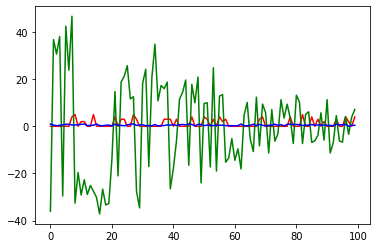

In [70]:
plt.plot(x[10][:100], 'r')
plt.plot(pxq[3][:100], 'g')
plt.plot(random[100][:100], 'b')
plt.show()

In [ ]:
rmse_result = []
pearson_result = []
for i in range(pxq.shape[0]):
    tmp_rmse = []
    tmp_pearson = []
    for j in range(x.shape[0]):
        tmp_rmse.append(np.sqrt(np.mean(np.square(pxq[i] - x[j]))))
        tmp_pearson.append(pearsonr(pxq[i], x[j])[0])
    rmse_result.append(min(tmp_rmse))
    pearson_result.append(max(tmp_pearson))
print('RMSE', np.mean(rmse_result), np.min(rmse_result))
print('Pearsonr', np.mean(pearson_result), np.max(pearson_result))

In [ ]:
rmse_result = []
pearson_result = []
for i in range(random.shape[0]):
    tmp_rmse = []
    tmp_pearson = []
    for j in range(x.shape[0]):
        tmp_rmse.append(np.sqrt(np.mean(np.square(random[i] - x[j]))))
        tmp_pearson.append(pearsonr(random[i], x[j])[0])
    rmse_result.append(min(tmp_rmse))
    pearson_result.append(max(tmp_pearson))
    print(i, min(tmp_rmse), max(tmp_pearson))
print('RMSE', np.mean(rmse_result), np.min(rmse_result))
print('Pearsonr', np.mean(pearson_result), np.max(pearson_result))